In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 12.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=317865 sha256=39b3480a046832c23e99bf16d3b628a02651bf1b3b249195644a669f08ed142c
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
!pip install requests

In [3]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:0000:01


In [4]:
from datetime import datetime,date,timedelta
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import display
warnings.filterwarnings('ignore') 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import requests
import time
from transformers import pipeline
import requests
import datetime
import json

#### Stock 1 : Reliance

In [7]:
tick = "RELIANCE.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
reliance_data = pd.DataFrame(d)
display(reliance_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2021-08-02,943.689636,956.458435,959.642761,941.990417,948.059143,10925104
2021-08-03,950.633545,963.496277,964.996155,952.627991,964.534668,11817299
2021-08-04,957.919067,970.880310,975.610657,963.150146,966.565247,13169800
2021-08-05,971.806885,984.956055,994.439819,971.111023,975.749084,21252078
2021-08-06,951.225525,964.096252,990.817078,959.342773,982.971558,16620987
...,...,...,...,...,...,...
2024-10-14,1372.525024,1372.525024,1380.074951,1368.250000,1379.449951,12221432
2024-10-15,1344.025024,1344.025024,1371.699951,1340.699951,1358.525024,33762794


#### Stock 2 : Tata Motors

In [8]:
tick = "TATAMOTORS.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
tatamotor_data = pd.DataFrame(d)
display(tatamotor_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2021-08-02,295.017303,296.850006,299.399994,295.600006,299.149994,19273390
2021-08-03,301.824982,303.700012,304.500000,297.700012,298.500000,31063992
2021-08-04,296.309265,298.149994,306.450012,297.200012,304.750000,26186248
2021-08-05,297.849701,299.700012,300.899994,292.750000,295.500000,20704901
2021-08-06,298.197510,300.049988,303.399994,297.649994,300.049988,16001898
...,...,...,...,...,...,...
2024-10-14,928.250000,928.250000,940.000000,925.349976,930.000000,5740649
2024-10-15,917.299988,917.299988,935.349976,913.000000,932.950012,9058919


#### Stock 3 :- Infosys

In [9]:
tick = "INFY.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
infosys_data = pd.DataFrame(d)
display(infosys_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,,
2021-08-02,1516.112183,1631.550049,1634.750000,1619.199951,1627.449951,5553389
2021-08-03,1538.088867,1655.199951,1658.650024,1635.599976,1647.000000,5513668
2021-08-04,1532.560059,1649.250000,1679.900024,1639.050049,1669.099976,6740391
2021-08-05,1536.555664,1653.550049,1666.000000,1647.050049,1649.500000,5420536
2021-08-06,1533.442505,1650.199951,1660.650024,1644.000000,1657.000000,3754855
...,...,...,...,...,...,...
2024-10-14,1936.846802,1958.900024,1969.500000,1931.099976,1932.150024,3751378
2024-10-15,1937.242310,1959.300049,1991.449951,1951.750000,1960.000000,5353705


#### Stock 4 :- Maruti Suzuki India Ltd.

In [10]:
tick = "MARUTI.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
maruti_data = pd.DataFrame(d)
display(maruti_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MARUTI.NS,MARUTI.NS,MARUTI.NS,MARUTI.NS,MARUTI.NS,MARUTI.NS
Date,,,,,,
2021-08-02,6856.229004,7076.950195,7107.450195,7031.000000,7100.000000,433760
2021-08-03,6974.859375,7199.399902,7221.000000,7086.100098,7124.950195,470570
2021-08-04,6881.369141,7102.899902,7248.600098,7003.500000,7220.000000,484122
2021-08-05,6851.778320,7027.549805,7079.950195,7006.000000,7072.000000,495133
2021-08-06,6923.195801,7100.799805,7168.500000,7042.549805,7054.799805,517575
...,...,...,...,...,...,...
2024-10-14,12537.849609,12537.849609,12799.000000,12462.299805,12775.000000,488067
2024-10-15,12446.750000,12446.750000,12709.000000,12355.000000,12709.000000,532135


#### Stock 5 :- Bharti Airtel Ltd.

In [11]:
tick = "BHARTIARTL.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
airtel_data = pd.DataFrame(d)
display(airtel_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
Date,,,,,,
2021-08-02,546.708130,554.734863,559.446411,549.679749,555.569214,6372299
2021-08-03,561.267029,569.507507,571.274353,551.741089,557.532349,21680353
2021-08-04,555.656250,563.814392,576.084045,559.789917,564.403320,21816567
2021-08-05,579.163330,587.666565,607.592468,566.857239,566.857239,72423461
2021-08-06,588.063110,596.697021,605.580261,577.654541,583.543945,29055626
...,...,...,...,...,...,...
2024-10-14,1695.599976,1695.599976,1710.050049,1679.349976,1686.000000,2069815
2024-10-15,1717.250000,1717.250000,1732.750000,1699.949951,1708.000000,5891334


#### Stock 6 :- Asian Paints Ltd.

In [12]:
tick = "ASIANPAINT.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
asianpaint_data = pd.DataFrame(d)
display(asianpaint_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
Date,,,,,,
2021-08-02,2891.667236,2974.050049,2986.800049,2960.649902,2985.600098,832285
2021-08-03,2943.150635,3027.000000,3065.000000,2994.199951,3020.000000,2433031
2021-08-04,2934.983154,3018.600098,3053.300049,3012.000000,3040.600098,659295
2021-08-05,2905.619385,2988.399902,3040.000000,2980.050049,3034.000000,693694
2021-08-06,2884.277588,2966.449951,3001.000000,2961.449951,2995.000000,744159
...,...,...,...,...,...,...
2024-10-14,3033.949463,3039.149902,3055.000000,3017.199951,3037.000000,716011
2024-10-15,3061.851807,3067.100098,3096.800049,3047.649902,3075.000000,1242322


#### Stock 7 :- JSW Steel Ltd.

In [13]:
tick = "JSWSTEEL.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
jsw_data = pd.DataFrame(d)
display(jsw_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JSWSTEEL.NS,JSWSTEEL.NS,JSWSTEEL.NS,JSWSTEEL.NS,JSWSTEEL.NS,JSWSTEEL.NS
Date,,,,,,
2021-08-02,715.674683,746.700012,751.450012,733.500000,741.400024,6971560
2021-08-03,709.540588,740.299988,746.000000,728.400024,746.000000,6939253
2021-08-04,716.201843,747.250000,754.000000,736.400024,741.000000,6680733
2021-08-05,731.537048,763.250000,765.400024,740.500000,747.250000,8613347
2021-08-06,725.882202,757.349976,776.500000,755.700012,767.500000,8973665
...,...,...,...,...,...,...
2024-10-14,1012.500000,1012.500000,1032.000000,1009.400024,1017.000000,1831080
2024-10-15,1000.849976,1000.849976,1020.599976,992.000000,1012.500000,1444250


#### Stock 8 :- Mahindra & Mahindra Ltd.

In [14]:
tick = "M&M.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
mahindra_data = pd.DataFrame(d)
display(mahindra_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,M&M.NS,M&M.NS,M&M.NS,M&M.NS,M&M.NS,M&M.NS
Date,,,,,,
2021-08-02,729.229431,757.700012,759.049988,744.599976,750.000000,2260861
2021-08-03,741.885376,770.849976,772.700012,755.500000,763.400024,3235393
2021-08-04,737.458252,766.250000,775.799988,764.549988,773.000000,2659372
2021-08-05,730.817383,759.349976,766.349976,756.700012,766.000000,1451370
2021-08-06,729.758850,758.250000,772.299988,755.000000,763.799988,4471604
...,...,...,...,...,...,...
2024-10-14,3154.899902,3154.899902,3174.000000,3115.000000,3151.000000,2425178
2024-10-15,3155.800049,3155.800049,3192.949951,3086.550049,3177.000000,2245701


#### Stock 9 :- Hyundai

In [15]:
tick = "005380.KS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
hyundai_data = pd.DataFrame(d)
display(hyundai_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005380.KS,005380.KS,005380.KS,005380.KS,005380.KS,005380.KS
Date,,,,,,
2021-08-02,191860.562500,220000.0,220500.0,217000.0,218000.0,676544
2021-08-03,194912.859375,223500.0,223500.0,218000.0,219000.0,775231
2021-08-04,196221.031250,225000.0,225000.0,222500.0,224000.0,542319
2021-08-05,194476.843750,223000.0,224500.0,222500.0,223000.0,470741
2021-08-06,194040.812500,222500.0,225000.0,222500.0,224500.0,384056
...,...,...,...,...,...,...
2024-10-14,248500.000000,248500.0,254000.0,248000.0,250500.0,307668
2024-10-15,246000.000000,246000.0,249500.0,246000.0,249500.0,382087


#### Stock 10 :- Bajaj

In [16]:
tick = "BAJAJ-AUTO.NS"
d = yf.download(tick,start="2021-08-01",end="2024-10-19",interval="1d")
bajaj_data = pd.DataFrame(d)
display(bajaj_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,BAJAJ-AUTO.NS
Date,,,,,,
2021-08-02,3563.622803,3841.550049,3880.000000,3813.199951,3874.000000,351187
2021-08-03,3551.238525,3828.199951,3838.000000,3805.649902,3830.000000,408981
2021-08-04,3554.763672,3832.000000,3864.850098,3816.000000,3835.000000,363955
2021-08-05,3542.472168,3818.750000,3858.000000,3813.600098,3842.000000,333818
2021-08-06,3569.467041,3847.850098,3872.350098,3797.250000,3833.000000,504011
...,...,...,...,...,...,...
2024-10-14,11899.299805,11899.299805,11990.099609,11861.599609,11928.799805,177045
2024-10-15,11521.500000,11521.500000,11950.000000,11467.000000,11950.000000,476945


In [17]:
reliance_data.to_csv('/kaggle/working/reliance_data.csv')
tatamotor_data.to_csv('/kaggle/working/tatamotor_data.csv')
infosys_data.to_csv('/kaggle/working/infosys_data.csv')
maruti_data.to_csv('/kaggle/working/maruti_data.csv')
airtel_data.to_csv('/kaggle/working/airtel_data.csv')
asianpaint_data.to_csv('/kaggle/working/asianpaint_data.csv')
jsw_data.to_csv('/kaggle/working/jsw_data.csv')
mahindra_data.to_csv('/kaggle/working/mahindra_data.csv')
hyundai_data.to_csv('/kaggle/working/hyundai_data.csv')
bajaj_data.to_csv('/kaggle/working/bajaj_data.csv')

In [34]:
def predict(stock_name, stock_data):
    print(f"\n---------------------------------------For Stock {stock_name}---------------------------------------")

    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data = stock_data.sort_values('Date')

    features = stock_data[['High', 'Low']].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)

    def create_sequences(data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i:i + seq_length]
            y = data[i + seq_length, [0, 1]]
            xs.append(x)
            ys.append(y)
        return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

    seq_length = 60
    X, y = create_sequences(scaled_features, seq_length)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    test_dates = stock_data['Date'].values[seq_length + len(X_train):]

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

    class LSTMModel(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_layers):
            super(LSTMModel, self).__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, 2)

        def forward(self, x):
            h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
            c0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
            out, _ = self.lstm(x, (h0, c0))  # LSTM takes hidden and cell states
            out = self.fc(out[:, -1, :])  # Fully connected layer on the last time step
            return out

    input_dim = 2
    hidden_dim = 512
    num_layers = 2

    model = LSTMModel(input_dim, hidden_dim, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    epochs = 20
    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        test_loss = 0
        for batch_x, batch_y in test_loader:
            output = model(batch_x)
            loss = criterion(output, batch_y)
            test_loss += loss.item()
        print(f'Test Loss: {test_loss / len(test_loader):.4f}')

    with torch.no_grad():
        predictions = model(X_test).detach().numpy()
        predictions = scaler.inverse_transform(predictions)
        actuals = scaler.inverse_transform(y_test.numpy())

    predictions_df = pd.DataFrame({
        'Date': pd.to_datetime(test_dates),
        'Actual High': actuals[:, 0],
        'Predicted High': predictions[:, 0],
        'Actual Low': actuals[:, 1],
        'Predicted Low': predictions[:, 1]
    })

    display(predictions_df)

    last_sequence = torch.tensor(scaled_features[-seq_length:], dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_day_prediction = model(last_sequence).numpy()
        next_day_prediction = scaler.inverse_transform(next_day_prediction)[0]
        current_high_price = scaler.inverse_transform([[scaled_features[-1][0], 0]])[0][0]
        print(f"Predicted High for the Next Day: {next_day_prediction[0]:.2f}, Predicted Low for the Next Day: {next_day_prediction[1]:.2f}")

    threshold = 0.01
    price_diff = (next_day_prediction[0] - current_high_price) / current_high_price

    if price_diff > threshold:
        print("Consider Buying The Stocks")
    elif price_diff < -threshold:
        print("Consider Selling The Stocks")
    else:
        print("Consider To Hold The Stocks")

    display_graph(test_dates, actuals, predictions)
    r2_high = r2_score(actuals[:, 0], predictions[:, 0])
    r2_low = r2_score(actuals[:, 1], predictions[:, 1])
    mae_high = mean_absolute_error(actuals[:, 0], predictions[:, 0])
    mae_low = mean_absolute_error(actuals[:, 1], predictions[:, 1])

    max_r2 = max(r2_high, r2_low)
    avg_mae = (mae_high + mae_low) / 2

    print(f"R^2 Score: {max_r2:.2f}")
    print(f"MAE : {avg_mae:.2f}")


In [19]:
def display_graph(test_dates, actuals, predictions):   
    print(f"\n-------------------------------------------------------------VISUALIZING-------------------------------------------------------------")
    dates = pd.to_datetime(test_dates)
    actual_high = actuals[:, 0]
    predicted_high = predictions[:, 0]
    actual_low = actuals[:, 1]
    predicted_low = predictions[:, 1]

    fig, axs = plt.subplots(2, figsize=(10, 8), sharex=True)

    axs[0].plot(dates, actual_high, label='Actual High', color='blue')
    axs[0].plot(dates, predicted_high, label='Predicted High', color='red', linestyle='--')
    axs[0].set_title('Actual High vs Predicted High')
    axs[0].set_ylabel('Stock Price')
    axs[0].legend()
    
    axs[1].plot(dates, actual_low, label='Actual Low', color='green')
    axs[1].plot(dates, predicted_low, label='Predicted Low', color='orange', linestyle='--')
    axs[1].set_title('Actual Low vs Predicted Low')
    axs[1].set_ylabel('Stock Price')
    axs[1].legend()

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error

def model_accuracy(actuals_high, predictions_high, actuals_low, predictions_low):
    print("\n---------------------------------------MODEL ACCURACY---------------------------------------")

    r2_high = r2_score(actuals_high, predictions_high)
    r2_low = r2_score(actuals_low, predictions_low)
    mae_high = mean_absolute_error(actuals_high, predictions_high)
    mae_low = mean_absolute_error(actuals_low, predictions_low)
    max_accuracy = max(r2_high, r2_low)
    avg_mae = (mae_high + mae_low) / 2
    print(f"R^2 Score: {max_accuracy:.2f}")
    print(f"MAE : {avg_mae:.2f}")


In [21]:
def choose_stock(choice):
    if(choice == 1):
        file_path = '/kaggle/input/numeric-data/reliance_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("RELIANCE",stock_data)
    
    elif(choice == 2):
        file_path = '/kaggle/input/numeric-data/bajaj_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("BAJAJ",stock_data)    
    
    elif(choice == 3):
        file_path = '/kaggle/input/numeric-data/airtel_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("BHARTI AIRTEL",stock_data) 
    
    elif(choice == 4):
        file_path = '/kaggle/input/numeric-data/maruti_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("MARUTI SUZUKI",stock_data) 
    
    elif(choice == 5):
        file_path = '/kaggle/input/numeric-data/infosys_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("INFOSYS",stock_data)   
    
    elif(choice == 6):
        file_path = '/kaggle/input/numeric-data/asianpaint_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("ASIAN PAINTS",stock_data) 
    
    elif(choice == 7):
        file_path = '/kaggle/input/numeric-data/jsw_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("JSW STEEL",stock_data)
    
    elif(choice == 8):
        file_path = '/kaggle/input/numeric-data/mahindra_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("MAHINDRA",stock_data) 
    
    elif(choice == 9):
        file_path = '/kaggle/input/numeric-data/tatamotor_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("TATAMOTORS",stock_data)     
    
    elif(choice == 10):
        file_path = '/kaggle/input/numeric-data/hyundai_data.csv'
        stock_data = pd.read_csv(file_path)
        predict("HYUNDAI",stock_data)   
    
    else:
        print("Please enter valid choice")

In [32]:
def menu():
    stock_list = [[1,"RELIANCE"],[2,"BAJAJ"],[3,"BHARTI AIRTEL"],[4,"MARUTI SUZUKI"],[5,"INFOSYS"],[6,"ASIAN PAINTS"],[7,"JSW STEEL"],[8,"MAHINDRA"],[9,"TATAMOTORS"],[10,"HYUNDAI"]]
    sl = pd.DataFrame(stock_list,columns=["Sr No","Stock Name"])
    display(sl.style.hide(axis='index'))
    choice = int(input("Enter Serial Number For Stock You Want To Predict : "))
    choose_stock(choice)

Sr No,Stock Name
1,RELIANCE
2,BAJAJ
3,BHARTI AIRTEL
4,MARUTI SUZUKI
5,INFOSYS
6,ASIAN PAINTS
7,JSW STEEL
8,MAHINDRA
9,TATAMOTORS
10,HYUNDAI


Enter Serial Number For Stock You Want To Predict :  3



---------------------------------------For Stock BHARTI AIRTEL---------------------------------------
Epoch [1/20], Loss: 0.0135
Epoch [2/20], Loss: 0.0084
Epoch [3/20], Loss: 0.0044
Epoch [4/20], Loss: 0.0025
Epoch [5/20], Loss: 0.0216
Epoch [6/20], Loss: 0.0091
Epoch [7/20], Loss: 0.0108
Epoch [8/20], Loss: 0.0093
Epoch [9/20], Loss: 0.0081
Epoch [10/20], Loss: 0.0092
Epoch [11/20], Loss: 0.0068
Epoch [12/20], Loss: 0.0073
Epoch [13/20], Loss: 0.0021
Epoch [14/20], Loss: 0.0008
Epoch [15/20], Loss: 0.0006
Epoch [16/20], Loss: 0.0004
Epoch [17/20], Loss: 0.0002
Epoch [18/20], Loss: 0.0002
Epoch [19/20], Loss: 0.0005
Epoch [20/20], Loss: 0.0002
Test Loss: 0.0018


,Date,Actual High,Predicted High,Actual Low,Predicted Low
0,2024-03-14,1199.699951,1171.867188,1163.550049,1161.710205
1,2024-03-15,1222.800171,1175.520020,1187.849976,1165.315552
2,2024-03-18,1230.550049,1179.939331,1215.199951,1169.716553
3,2024-03-19,1240.400024,1186.060791,1214.599976,1175.927368
4,2024-03-20,1239.000000,1192.972534,1223.650024,1182.997314
...,...,...,...,...,...
142,2024-10-14,1710.050049,1684.008545,1679.349976,1684.475586
143,2024-10-15,1732.750000,1684.405029,1699.949951,1684.914917
144,2024-10-16,1742.250000,1687.281006,1717.099976,1687.918823
145,2024-10-17,1737.950073,1692.074219,1694.400024,1692.927002


Predicted High for the Next Day: 1698.16, Predicted Low for the Next Day: 1699.36
Consider Selling The Stocks

-------------------------------------------------------------VISUALIZING-------------------------------------------------------------


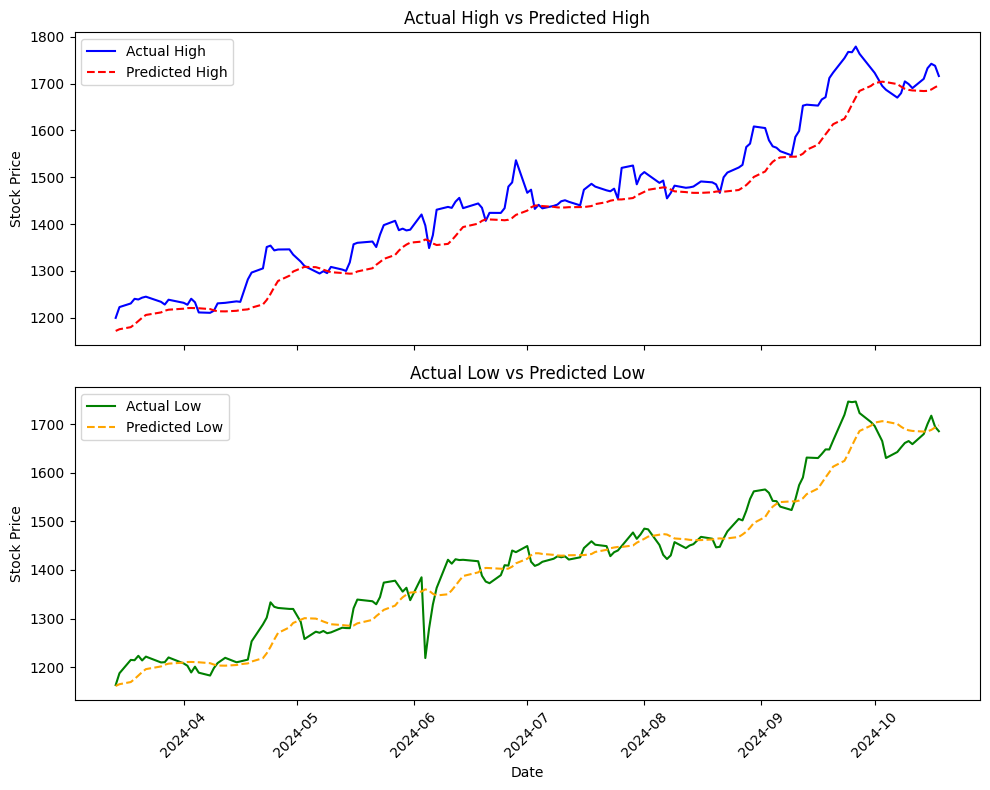

R^2 Score: 0.94
MAE : 34.31


In [35]:
menu()

In [91]:
# menu()

In [92]:
#menu()

In [93]:
#menu()

### Performing Sentiment Analysis on Stock News Titles Using distilbert

In [1]:
from transformers import pipeline
import pandas as pd

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", return_all_scores=True)

def analyze_stock_sentiment(stock_news_df, stock_name):
    def get_sentiment_score(text):
        result = sentiment_pipeline(text)[0]
        negative_score = result[0]['score']
        positive_score = result[1]['score']
        return positive_score - negative_score 
    
    stock_news_df['bert_sentiment'] = stock_news_df['Title'].apply(get_sentiment_score)
    
    stock_news_df['date'] = pd.to_datetime(stock_news_df['Date'], dayfirst=True).dt.strftime('%d-%m-%Y')
    
    output_file = f'{stock_name}_news_with_sentiment_scores.csv'
    
    stock_news_df[['date', 'bert_sentiment']].to_csv(output_file, index=False)
    
    print(f"Sentiment scores and dates have been saved to '{output_file}'.")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### Calculating DateWise Average Sentiment Score

In [39]:
def calculate_average_sentiment(df, stock_name):
    avg_sentiment_df = df.groupby('date', as_index=False)['bert_sentiment'].mean()
    avg_sentiment_df.rename(columns={'bert_sentiment': f'{stock_name}_avg_sentiment'}, inplace=True)
    return avg_sentiment_df

#### Fetching news

In [3]:
import requests
import pandas as pd
from datetime import datetime

api_key = "d105f7cab2a3d850a7441a1ded2973e2"

stocks = [
    "RELIANCE",
    "BAJAJ",
    "BHARTI AIRTEL",
    "MARUTI SUZUKI",
    "INFOSYS",
    "ASIAN PAINTS",
    "JSW STEEL",
    "MAHINDRA",
    "TATA",
    "HYUNDAI",
]

from_date = "2021-01-01"
to_date = datetime.now().strftime("%Y-%m-%d")

base_url = "http://api.mediastack.com/v1/news"

for stock_symbol in stocks:
    params = {
        "access_key": api_key,
        "keywords": stock_symbol,
        "languages": "en",
        "date": f"{from_date},{to_date}",
        "limit": 100
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        articles = data.get("data", [])
        if articles:
            news_data = [
                {"title": article["title"], "url": article["url"], "published_at": article["published_at"]}
                for article in articles
            ]
            df = pd.DataFrame(news_data)
            file_name = f"{stock_symbol.replace(' ', '_')}_news.csv"
            df.to_csv(file_name, index=False)
        else:
            print(f"No news found for {stock_symbol}")
    else:
        print(f"Error fetching news for {stock_symbol}: {response.status_code}, {response.text}")

### Fetching Reliance Stock News Data AND Performing Sentimental Analysis

In [6]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Reliance',
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []

def fetch_all_records_for_2021():
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles

reliance_articles_2021 = fetch_all_records_for_2021()

Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429


In [41]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Reliance',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []

def fetch_all_records_for_2022():
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles

reliance_articles_2022 = fetch_all_records_for_2022()

Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429


In [98]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Reliance',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


reliance_articles_2023 = fetch_all_records_for_2023()

In [4]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Reliance', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', []) 
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


reliance_articles_2024 = fetch_all_records_for_2024()

Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Total articles fetched: 0


In [100]:
all_reliance_articles = (reliance_articles_2021 + 
                         reliance_articles_2022 + 
                         reliance_articles_2023 + 
                         reliance_articles_2024)

In [101]:
import requests
import datetime
import json


def parse_english_articles_to_dataframe(articles):
    
    titles = []
    dates = []
    
    for article in articles:
       
        if article.get('language', '') == 'English':
           
            seendate_str = article.get('seendate', '')
            if seendate_str:
                
                seendate = datetime.strptime(seendate_str, '%Y%m%dT%H%M%SZ')
              
                formatted_date = seendate.strftime('%d-%m-%Y')
            else:
                formatted_date = 'No date available'
            
           
            title = article.get('title', 'No title available')
            
           
            dates.append(formatted_date)
            titles.append(title)
    
    
    df = pd.DataFrame({
        'Title': titles,
        'Date': dates
    })
    
    return df


In [102]:
from datetime import datetime

df_english_articles_reliance = parse_english_articles_to_dataframe(all_reliance_articles)
df_english_articles_reliance = df_english_articles_reliance.drop_duplicates(subset = 'Title')

reliance_data = pd.read_csv('/kaggle/input/numeric-data/reliance_data.csv')

analyze_stock_sentiment(df_english_articles_reliance, 'Reliance')

Sentiment scores and dates have been saved to 'Reliance_news_with_sentiment_scores.csv'.


In [103]:
reliance_avg_sentiment_df = calculate_average_sentiment(df_english_articles_reliance, 'Reliance')

reliance_avg_sentiment_df.to_csv('/kaggle/working/Reliance_avg_sentiment_scores.csv', index=False)

reliance_avg_sentiment_df['date'] = pd.to_datetime(reliance_avg_sentiment_df['date'], format='%d-%m-%Y')
reliance_data['Date'] = pd.to_datetime(reliance_data['Date']) 

merged_df = pd.merge(reliance_avg_sentiment_df, reliance_data, left_on='date', right_on='Date', how='inner')

merged_df.drop(columns=['Date'], inplace=True)

merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_reliance_data_with_sentiment.csv', index=False)

merged_reliance = pd.read_csv('/kaggle/working/merged_reliance_data_with_sentiment.csv')

### Fetching Tata Motors Stock News Data AND Performing Sentimental Analysis

In [1]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Tata Motors',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
    
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


tataMotors_articles_2021 = fetch_all_records_for_2021()

Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429
Failed to fetch data: 429


In [105]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Tata Motors',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
  
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2022():
    
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


tataMotors_articles_2022 = fetch_all_records_for_2022()

In [106]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Tata Motors',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


tataMotors_articles_2023 = fetch_all_records_for_2023()

In [107]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Tata Motors',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31) 
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


tataMotors_articles_2024 = fetch_all_records_for_2024()

JSON decoding failed: Expecting value: line 1 column 1 (char 0)
Response content: b'Invalid query start date.\n'
JSON decoding failed: Expecting value: line 1 column 1 (char 0)
Response content: b'Invalid query start date.\n'


In [108]:
all_tataMotors_articles = (tataMotors_articles_2021 + 
                         tataMotors_articles_2022 + 
                         tataMotors_articles_2023 + 
                         tataMotors_articles_2024)

In [109]:
from datetime import datetime

df_english_articles_tataMotors = parse_english_articles_to_dataframe(all_tataMotors_articles)
df_english_articles_tataMotors = df_english_articles_tataMotors.drop_duplicates(subset = 'Title')

tataMotors_data = pd.read_csv('/kaggle/input/numeric-data/tatamotor_data.csv')

analyze_stock_sentiment(df_english_articles_tataMotors, 'TataMotors')

KeyboardInterrupt: 

In [ ]:
tataMotors_avg_sentiment_df = calculate_average_sentiment(df_english_articles_tataMotors, 'TataMotors')

tataMotors_avg_sentiment_df.to_csv('/kaggle/working/tataMotors_avg_sentiment_df.csv', index=False)

tataMotors_avg_sentiment_df['date'] = pd.to_datetime(tataMotors_avg_sentiment_df['date'], format='%d-%m-%Y')
tataMotors_data['Date'] = pd.to_datetime(tataMotors_data['Date'])  

merged_df = pd.merge(tataMotors_avg_sentiment_df, tataMotors_data, left_on='date', right_on='Date', how='inner')

merged_df.drop(columns=['Date'], inplace=True)


merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_tataMotors_data_with_sentiment.csv', index=False)

merged_tataMotors = pd.read_csv('/kaggle/working/merged_tataMotors_data_with_sentiment.csv')

### Fetching Infosys Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Infosys', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
   
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


infosys_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Infosys',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2022():
    
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


infosys_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Infosys',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


infosys_articles_2023 = fetch_all_records_for_2023()

In [5]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Infosys',  
        'mode': 'ArtList', 
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '') 
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


infosys_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_infosys_articles = (infosys_articles_2021 + 
                         infosys_articles_2022 + 
                         infosys_articles_2023 + 
                         infosys_articles_2024)

In [ ]:
df_english_articles_infosys = parse_english_articles_to_dataframe(all_infosys_articles)
df_english_articles_infosys = df_english_articles_infosys.drop_duplicates(subset='Title')

infosys_data = pd.read_csv('/kaggle/input/numeric-data/infosys_data.csv')

analyze_stock_sentiment(df_english_articles_infosys, 'Infosys')

In [ ]:
infosys_avg_sentiment_df = calculate_average_sentiment(df_english_articles_infosys, 'Infosys')
infosys_avg_sentiment_df.to_csv('/kaggle/working/infosys_avg_sentiment_df.csv', index=False)

infosys_avg_sentiment_df['date'] = pd.to_datetime(infosys_avg_sentiment_df['date'], format='%d-%m-%Y')
infosys_data['Date'] = pd.to_datetime(infosys_data['Date'])

merged_infosys_df = pd.merge(infosys_avg_sentiment_df, infosys_data, left_on='date', right_on='Date', how='inner')
merged_infosys_df.drop(columns=['Date'], inplace=True)
merged_infosys_df.sort_values(by='date', inplace=True)

merged_infosys_df.to_csv('merged_infosys_data_with_sentiment.csv', index=False)

merged_infosys = pd.read_csv('/kaggle/working/merged_infosys_data_with_sentiment.csv')

### Fetching Maruti Suzuki Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Maruti Suzuki',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
    
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


maruti_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Maruti Suzuki',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2022():
   
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


maruti_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Maruti Suzuki',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    

    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


maruti_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Maruti Suzuki',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
     
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
      
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


maruti_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_marutiSuzuki_articles = (maruti_articles_2021 + 
                         maruti_articles_2022 + 
                         maruti_articles_2023 + 
                         maruti_articles_2024)

In [ ]:
df_english_articles_marutiSuzuki = parse_english_articles_to_dataframe(all_marutiSuzuki_articles)
df_english_articles_marutiSuzuki = df_english_articles_marutiSuzuki.drop_duplicates(subset='Title')

marutiSuzuki_data = pd.read_csv('/kaggle/input/numeric-data/maruti_data.csv')

analyze_stock_sentiment(df_english_articles_marutiSuzuki, 'MarutiSuzuki')

In [ ]:
marutiSuzuki_avg_sentiment_df = calculate_average_sentiment(df_english_articles_marutiSuzuki, 'MarutiSuzuki')
marutiSuzuki_avg_sentiment_df.to_csv('/kaggle/working/marutiSuzuki_avg_sentiment_df.csv', index=False)

marutiSuzuki_avg_sentiment_df['date'] = pd.to_datetime(marutiSuzuki_avg_sentiment_df['date'], format='%d-%m-%Y')
marutiSuzuki_data['Date'] = pd.to_datetime(marutiSuzuki_data['Date'])

merged_df = pd.merge(marutiSuzuki_avg_sentiment_df, marutiSuzuki_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_marutiSuzuki_data_with_sentiment.csv', index=False)

merged_marutiSuzuki = pd.read_csv('/kaggle/working/merged_marutiSuzuki_data_with_sentiment.csv')

### Fetching Bharti Airtel Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Airtel',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2021():
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
  
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
      
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


airtel_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Airtel',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']
    else:
        return []


def fetch_all_records_for_2022():
   
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date 
        
     
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


airtel_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Airtel',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
    
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


airtel_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Airtel',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


airtel_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_airtel_articles = (airtel_articles_2021 + 
                         airtel_articles_2022 + 
                         airtel_articles_2023 + 
                        airtel_articles_2024)

In [ ]:
from datetime import datetime

df_english_articles_airtel = parse_english_articles_to_dataframe(all_airtel_articles)
df_english_articles_airtel = df_english_articles_airtel.drop_duplicates(subset='Title')

airtel_data = pd.read_csv('/kaggle/input/numeric-data/airtel_data.csv')

analyze_stock_sentiment(df_english_articles_airtel, 'Airtel')

In [ ]:
airtel_avg_sentiment_df = calculate_average_sentiment(df_english_articles_airtel, 'Airtel')
airtel_avg_sentiment_df.to_csv('/kaggle/working/airtel_avg_sentiment_df.csv', index=False)

airtel_avg_sentiment_df['date'] = pd.to_datetime(airtel_avg_sentiment_df['date'], format='%d-%m-%Y')
airtel_data['Date'] = pd.to_datetime(airtel_data['Date'])

merged_df = pd.merge(airtel_avg_sentiment_df, airtel_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_airtel_data_with_sentiment.csv', index=False)

merged_airtel = pd.read_csv('/kaggle/working/merged_airtel_data_with_sentiment.csv')

### Fetching Asian Paints Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Asian Paints',  
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
   
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


asianpaints_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Asian Paints',  
        'mode': 'ArtList', 
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2022():
    
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


asianpaints_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Asian Paints',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        

        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


asianpaints_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Asian Paints', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles

asianpaints_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_asianpaints_articles = (asianpaints_articles_2021 + 
                         asianpaints_articles_2022 + 
                         asianpaints_articles_2023 + 
                        asianpaints_articles_2024)

In [ ]:
from datetime import datetime

df_english_articles_asianpaints = parse_english_articles_to_dataframe(all_asianpaints_articles)
df_english_articles_asianpaints = df_english_articles_asianpaints.drop_duplicates(subset='Title')

asianpaints_data = pd.read_csv('/kaggle/input/numeric-data/asianpaint_data.csv')

analyze_stock_sentiment(df_english_articles_asianpaints, 'AsianPaints')

In [ ]:
asianpaints_avg_sentiment_df = calculate_average_sentiment(df_english_articles_asianpaints, 'AsianPaints')
asianpaints_avg_sentiment_df.to_csv('/kaggle/working/asianpaints_avg_sentiment_df.csv', index=False)

asianpaints_avg_sentiment_df['date'] = pd.to_datetime(asianpaints_avg_sentiment_df['date'], format='%d-%m-%Y')
asianpaints_data['Date'] = pd.to_datetime(asianpaints_data['Date'])

merged_df = pd.merge(asianpaints_avg_sentiment_df, asianpaints_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_asianpaints_data_with_sentiment.csv', index=False)

merged_asianpaints = pd.read_csv('/kaggle/working/merged_asianpaints_data_with_sentiment.csv')


### Fetching JSW Steel Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'JSW Steel', 
        'mode': 'ArtList', 
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),    
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            return response.json().get('articles', [])
        except json.JSONDecodeError:
            return []
    else:
        return []


def fetch_all_records_for_2021():
   
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    

    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


jswsteel_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json
def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'JSW Steel', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2022():
  
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
  
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
      
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


jswsteel_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'JSW Steel', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


jswsteel_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'JSW Steel', 
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


jswsteel_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_jswsteel_articles = (jswsteel_articles_2021 + 
                         jswsteel_articles_2022 + 
                         jswsteel_articles_2023 + 
                        jswsteel_articles_2024)

In [ ]:
from datetime import datetime

df_english_articles_jsw = parse_english_articles_to_dataframe(all_jswsteel_articles)
df_english_articles_jsw = df_english_articles_jsw.drop_duplicates(subset='Title')

jsw_data = pd.read_csv('/kaggle/input/numeric-data/jsw_data.csv')

analyze_stock_sentiment(df_english_articles_jsw, 'JSW Steel')

In [ ]:
jsw_avg_sentiment_df = calculate_average_sentiment(df_english_articles_jsw, 'JSW Steel')
jsw_avg_sentiment_df.to_csv('/kaggle/working/jsw_avg_sentiment_df.csv', index=False)

jsw_avg_sentiment_df['date'] = pd.to_datetime(jsw_avg_sentiment_df['date'], format='%d-%m-%Y')
jsw_data['Date'] = pd.to_datetime(jsw_data['Date'])

merged_df = pd.merge(jsw_avg_sentiment_df, jsw_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_jsw_data_with_sentiment.csv', index=False)

merged_jsw = pd.read_csv('/kaggle/working/merged_jsw_data_with_sentiment.csv')

### Fetching Mahindra & Mahindra Ltd Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Mahindra', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2021():
    
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


mahindra_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Mahindra',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


deffetch_all_records_for_2022():
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


mahindra_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Mahindra', 
        'mode': 'ArtList', 
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2023():
   
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
  
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles

mahindra_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Mahindra',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '') 
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)  
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


mahindra_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_mahindra_articles = (mahindra_articles_2021 + 
                        mahindra_articles_2022 + 
                        mahindra_articles_2023 + 
                        mahindra_articles_2024)

In [ ]:
from datetime import datetime
import pandas as pd

df_english_articles_mahindra = parse_english_articles_to_dataframe(all_mahindra_articles)
df_english_articles_mahindra = df_english_articles_mahindra.drop_duplicates(subset='Title')

mahindra_data = pd.read_csv('/kaggle/input/numeric-data/mahindra_data.csv')

analyze_stock_sentiment(df_english_articles_mahindra, 'Mahindra')

In [ ]:
mahindra_avg_sentiment_df = calculate_average_sentiment(df_english_articles_mahindra, 'Mahindra')
mahindra_avg_sentiment_df.to_csv('/kaggle/working/mahindra_avg_sentiment_df.csv', index=False)

mahindra_avg_sentiment_df['date'] = pd.to_datetime(mahindra_avg_sentiment_df['date'], format='%d-%m-%Y')
mahindra_data['Date'] = pd.to_datetime(mahindra_data['Date'])

merged_df = pd.merge(mahindra_avg_sentiment_df, mahindra_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_mahindra_data_with_sentiment.csv', index=False)

merged_mahindra = pd.read_csv('/kaggle/working/merged_mahindra_data_with_sentiment.csv')

### Fetching Hyundai Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Hyundai',  
        'mode': 'ArtList',
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
    
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


hyundai_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Hyundai', 
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250 
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles'] 
    else:
        return []


def fetch_all_records_for_2022():
    
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


hyundai_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Hyundai',  
        'mode': 'ArtList', 
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
  
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


hyundai_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Hyundai',  
        'mode': 'ArtList',  
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '')  
            response_data = json.loads(response_content)
            return response_data.get('articles', [])  
        except json.JSONDecodeError as e:
            return []
    else:
        return []


def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31) 
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date  
        
       
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
      
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


hyundai_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_hyundai_articles = (hyundai_articles_2021 + 
                         hyundai_articles_2022 + 
                         hyundai_articles_2023 + 
                        hyundai_articles_2024)

In [ ]:
from datetime import datetime

df_english_articles_hyundai = parse_english_articles_to_dataframe(all_hyundai_articles)
df_english_articles_hyundai = df_english_articles_hyundai.drop_duplicates(subset='Title')

hyundai_data = pd.read_csv('/kaggle/input/numeric-data/hyundai_data.csv')

analyze_stock_sentiment(df_english_articles_hyundai, 'Hyundai')

In [ ]:
hyundai_avg_sentiment_df = calculate_average_sentiment(df_english_articles_hyundai, 'Hyundai')
hyundai_avg_sentiment_df.to_csv('/kaggle/working/hyundai_avg_sentiment_df.csv', index=False)

hyundai_avg_sentiment_df['date'] = pd.to_datetime(hyundai_avg_sentiment_df['date'], format='%d-%m-%Y')
hyundai_data['Date'] = pd.to_datetime(hyundai_data['Date'])

merged_df = pd.merge(hyundai_avg_sentiment_df, hyundai_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_hyundai_data_with_sentiment.csv', index=False)

merged_hyundai = pd.read_csv('/kaggle/working/merged_hyundai_data_with_sentiment.csv')


### Fetching Bajaj Stock News Data AND Performing Sentimental Analysis

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Bajaj', 
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2021():
  
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)
    
    current_date = start_date
    all_articles = []
    
   
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
        
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


bajaj_articles_2021 = fetch_all_records_for_2021()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Bajaj',  
        'mode': 'ArtList',
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2022():
  
    start_date = datetime.datetime(2022, 1, 1)
    end_date = datetime.datetime(2022, 12, 31)
    
    current_date = start_date
    all_articles = []
    
  
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date:
            next_date = end_date  
        
      
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles) 
        
      
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


bajaj_articles_2022 = fetch_all_records_for_2022()

In [ ]:
import requests
import datetime
import json


def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Bajaj', 
        'mode': 'ArtList', 
        'format': 'json',  
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'), 
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),     
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
   
    if response.status_code == 200:
        return response.json()['articles']  
    else:
        return []


def fetch_all_records_for_2023():
    
    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime(2023, 12, 31)
    
    current_date = start_date
    all_articles = []
    
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30) 
        if next_date > end_date
            next_date = end_date 
        
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
        
       
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles


bajaj_articles_2023 = fetch_all_records_for_2023()

In [ ]:
import requests
import datetime
import json

def fetch_gdelt_records(start_date, end_date):
    url = 'https://api.gdeltproject.org/api/v2/doc/doc'
    params = {
        'query': 'Bajaj',  
        'mode': 'ArtList',  
        'format': 'json',   
        'startdatetime': start_date.strftime('%Y%m%d%H%M%S'),  
        'enddatetime': end_date.strftime('%Y%m%d%H%M%S'),      
        'maxrecords': 250  
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        try:
            response_content = response.content.decode('utf-8').replace('\\', '') 
            response_data = json.loads(response_content)
            return response_data.get('articles', []) 
        except json.JSONDecodeError as e:
            return []
    else:
        return []

def fetch_all_records_for_2024():
    
    start_date = datetime.datetime(2024, 1, 1)
    end_date = datetime.datetime(2024, 12, 31) 
    
    current_date = start_date
    all_articles = []
    
    while current_date < end_date:
        next_date = current_date + datetime.timedelta(days=30)  
        if next_date > end_date:
            next_date = end_date
        
        articles = fetch_gdelt_records(current_date, next_date)
        all_articles.extend(articles)  
  
        current_date = next_date + datetime.timedelta(days=1)
    
    return all_articles

bajaj_articles_2024 = fetch_all_records_for_2024()

In [ ]:
all_bajaj_articles = (bajaj_articles_2021 + 
                         bajaj_articles_2022 + 
                         bajaj_articles_2023 + 
                        bajaj_articles_2024)

In [ ]:
from datetime import datetime

df_english_articles_bajaj = parse_english_articles_to_dataframe(all_bajaj_articles)
df_english_articles_bajaj = df_english_articles_bajaj.drop_duplicates(subset='Title')

bajaj_data = pd.read_csv('/kaggle/input/numeric-data/bajaj_data.csv')

analyze_stock_sentiment(df_english_articles_bajaj, 'Bajaj')

In [ ]:
bajaj_avg_sentiment_df = calculate_average_sentiment(df_english_articles_bajaj, 'Bajaj')
bajaj_avg_sentiment_df.to_csv('/kaggle/working/bajaj_avg_sentiment_df.csv', index=False)

bajaj_avg_sentiment_df['date'] = pd.to_datetime(bajaj_avg_sentiment_df['date'], format='%d-%m-%Y')
bajaj_data['Date'] = pd.to_datetime(bajaj_data['Date'])

merged_df = pd.merge(bajaj_avg_sentiment_df, bajaj_data, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)
merged_df.sort_values(by='date', inplace=True)

merged_df.to_csv('merged_bajaj_data_with_sentiment.csv', index=False)

merged_bajaj = pd.read_csv('/kaggle/working/merged_bajaj_data_with_sentiment.csv')

In [ ]:
reliance_data = pd.read_csv("/kaggle/input/numeric-data/reliance_data.csv")
tatamotor_data = pd.read_csv("/kaggle/input/numeric-data/tatamotor_data.csv")
infosys_data = pd.read_csv("/kaggle/input/numeric-data/infosys_data.csv")
maruti_data = pd.read_csv("/kaggle/input/numeric-data/maruti_data.csv")
airtel_data = pd.read_csv("/kaggle/input/numeric-data/airtel_data.csv")
asianpaint_data = pd.read_csv("/kaggle/input/numeric-data/asianpaint_data.csv")
jsw_data = pd.read_csv("/kaggle/input/numeric-data/jsw_data.csv")
mahindra_data = pd.read_csv("/kaggle/input/numeric-data/mahindra_data.csv")
hyundai_data = pd.read_csv("/kaggle/input/numeric-data/hyundai_data.csv")
bajaj_data = pd.read_csv("/kaggle/input/numeric-data/bajaj_data.csv")

In [ ]:
def convert_date_to_datetime(stock_data):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    return stock_data

reliance_data = convert_date_to_datetime(reliance_data)
tatamotor_data = convert_date_to_datetime(tatamotor_data)
infosys_data = convert_date_to_datetime(infosys_data)
maruti_data = convert_date_to_datetime(maruti_data)
airtel_data = convert_date_to_datetime(airtel_data)
asianpaint_data = convert_date_to_datetime(asianpaint_data)
jsw_data = convert_date_to_datetime(jsw_data)
mahindra_data = convert_date_to_datetime(mahindra_data)
hyundai_data = convert_date_to_datetime(hyundai_data)
bajaj_data = convert_date_to_datetime(bajaj_data)

# TEST

In [26]:
# import pandas as pd
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from IPython.display import display

def predict_merged(stock_name, stock_data, sentiment):
    print(f"\n---------------------------------------For Stock {stock_name}---------------------------------------")

    stock_data['date'] = pd.to_datetime(stock_data['date'])
    stock_data = stock_data.sort_values('date')

    stock_data['SMA_10'] = stock_data['Close'].rolling(window=10).mean()
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

    features = stock_data[['High', 'Low', sentiment, 'Open', 'Close']].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)

    def create_sequences(data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i:i + seq_length]
            y = data[i + seq_length, [0, 1]]  
            xs.append(x)
            ys.append(y)
        return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

    seq_length = 90 
    X, y = create_sequences(scaled_features, seq_length)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    test_dates = stock_data['date'].values[seq_length + len(X_train):]

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    class GRUModel(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_layers):
            super(GRUModel, self).__init__()
            self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, 2)  

        def forward(self, x):
            h0 = torch.zeros(num_layers, x.size(0), hidden_dim).to(x.device)
            out, _ = self.gru(x, h0)
            out = self.fc(out[:, -1, :])  
            return out

    input_dim = 5  
    hidden_dim = 512
    num_layers = 2

    model = GRUModel(input_dim, hidden_dim, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    epochs = 20
    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        test_loss = 0
        for batch_x, batch_y in test_loader:
            output = model(batch_x)
            loss = criterion(output, batch_y)
            test_loss += loss.item()
        print(f'Test Loss: {test_loss / len(test_loader):.4f}')

    with torch.no_grad():
        predictions = model(X_test).detach().numpy()

    dummy_array = np.zeros((predictions.shape[0], 5))
    dummy_array[:, :2] = predictions 

    predictions_inverse = scaler.inverse_transform(dummy_array)

    predicted_high = predictions_inverse[:, 0]
    predicted_low = predictions_inverse[:, 1]

    actuals = y_test.numpy()
    dummy_actuals = np.zeros((actuals.shape[0], 5))
    dummy_actuals[:, :2] = actuals
    actuals_inverse = scaler.inverse_transform(dummy_actuals)

    actual_high = actuals_inverse[:, 0]
    actual_low = actuals_inverse[:, 1]

    predictions_df = pd.DataFrame({
        'Date': pd.to_datetime(test_dates),
        'Actual High': actual_high,
        'Predicted High': predicted_high,
        'Actual Low': actual_low,
        'Predicted Low': predicted_low
    })

    display(predictions_df)

    last_sequence = torch.tensor(scaled_features[-seq_length:], dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_day_prediction = model(last_sequence).numpy()
        next_day_prediction = scaler.inverse_transform([[next_day_prediction[0, 0], next_day_prediction[0, 1], 0, 0, 0]])[0]

    current_high_price = scaler.inverse_transform([[scaled_features[-1][0], 0, 0, 0, 0]])[0][0]
    print(f"Predicted High for the Next Day: {next_day_prediction[0]:.2f}, Predicted Low for the Next Day: {next_day_prediction[1]:.2f}")

    latest_sma_10 = stock_data['SMA_10'].iloc[-1]
    latest_sma_50 = stock_data['SMA_50'].iloc[-1]
    latest_close = stock_data['Close'].iloc[-1]

    if latest_sma_10 > latest_sma_50 and latest_close > latest_sma_10:
        print("Consider Buying The Stocks")
    elif latest_sma_10 < latest_sma_50 and latest_close < latest_sma_10:
        print("Consider Selling The Stocks")
    else:
        print("Hold The Stocks")

    display_graph(test_dates, actuals, predictions)
    model_accuracy(actual_high, predicted_high, actual_low, predicted_low)

In [27]:
merged_reliance = pd.read_csv('/kaggle/input/merged-dataset/merged_reliance_data_with_sentiment.csv')
merged_tatamotors = pd.read_csv('/kaggle/input/merged-dataset/merged_tataMotors_data_with_sentiment.csv')
merged_jsw = pd.read_csv('/kaggle/input/merged-dataset/merged_jsw_data_with_sentiment.csv')
merged_infosys = pd.read_csv('/kaggle/input/merged-dataset/merged_infosys_data_with_sentiment.csv')
merged_airtel = pd.read_csv('/kaggle/input/merged-dataset/merged_airtel_data_with_sentiment.csv')
merged_asianpaints = pd.read_csv('/kaggle/input/merged-dataset/merged_asianpaints_data_with_sentiment.csv')
merged_hyundai = pd.read_csv('/kaggle/input/merged-dataset/merged_hyundai_data_with_sentiment.csv')
merged_bajaj = pd.read_csv('/kaggle/input/merged-dataset/merged_bajaj_data_with_sentiment.csv')
merged_marutiSuzuki = pd.read_csv('/kaggle/input/merged-dataset/merged_marutiSuzuki_data_with_sentiment.csv')
merged_mahindra = pd.read_csv('/kaggle/input/merged-dataset/merged_mahindra_data_with_sentiment.csv')


---------------------------------------For Stock JSW Steel---------------------------------------
Epoch [1/20], Loss: 0.0113
Epoch [2/20], Loss: 0.0075
Epoch [3/20], Loss: 0.0017
Epoch [4/20], Loss: 0.0009
Epoch [5/20], Loss: 0.0018
Epoch [6/20], Loss: 0.0010
Epoch [7/20], Loss: 0.0008
Epoch [8/20], Loss: 0.0007
Epoch [9/20], Loss: 0.0007
Epoch [10/20], Loss: 0.0007
Epoch [11/20], Loss: 0.0005
Epoch [12/20], Loss: 0.0005
Epoch [13/20], Loss: 0.0007
Epoch [14/20], Loss: 0.0010
Epoch [15/20], Loss: 0.0005
Epoch [16/20], Loss: 0.0006
Epoch [17/20], Loss: 0.0005
Epoch [18/20], Loss: 0.0004
Epoch [19/20], Loss: 0.0004
Epoch [20/20], Loss: 0.0006
Test Loss: 0.0007


,Date,Actual High,Predicted High,Actual Low,Predicted Low
0,2024-03-28,840.849964,831.221641,819.999985,813.609963
1,2024-04-01,876.450009,836.434378,838.000010,817.312626
2,2024-04-02,881.849971,861.435162,861.549994,844.729022
3,2024-04-03,879.549986,885.079439,867.099983,866.780949
4,2024-04-04,878.650034,885.015960,853.549986,866.395520
...,...,...,...,...,...
128,2024-10-11,1025.949942,1012.262103,1005.999993,986.458010
129,2024-10-14,1031.999986,1023.020633,1009.400039,998.781818
130,2024-10-15,1020.599961,1030.033707,991.999987,1002.300202
131,2024-10-16,1004.799980,1019.011746,982.049977,992.137009


Predicted High for the Next Day: 993.51, Predicted Low for the Next Day: 965.13
Hold The Stocks

-------------------------------------------------------------VISUALIZING-------------------------------------------------------------


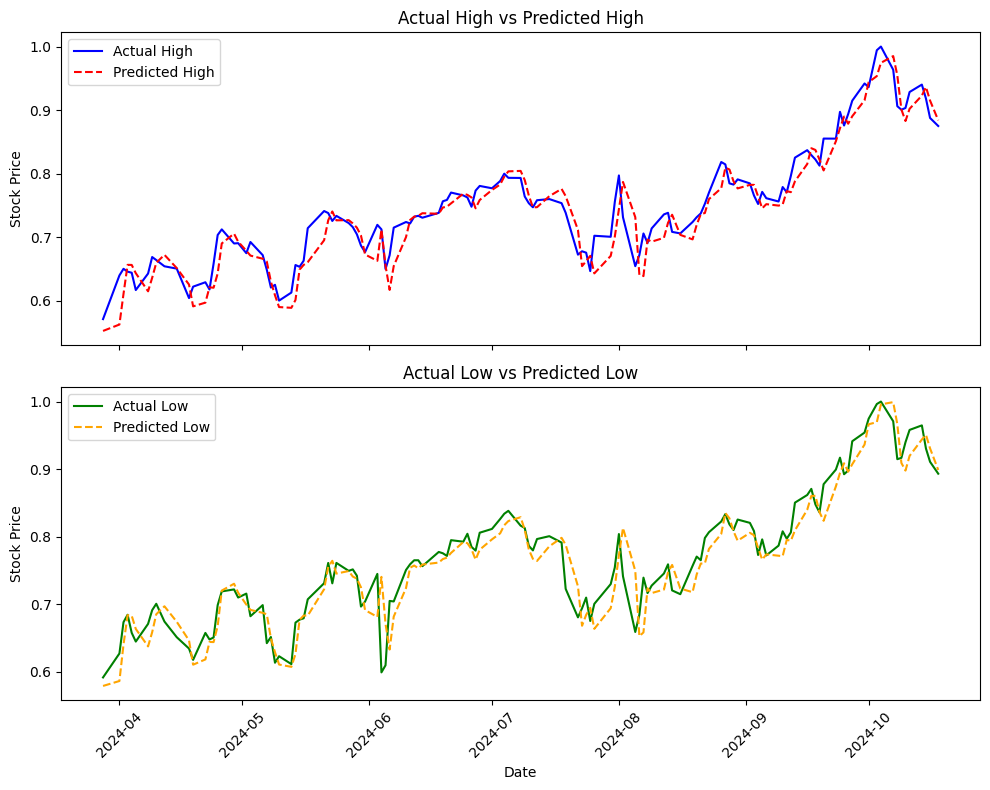


---------------------------------------MODEL ACCURACY---------------------------------------
R^2 Score: 0.91
MAE : 10.86


In [112]:
predict_merged('JSW Steel', merged_jsw,'JSW Steel_avg_sentiment')


---------------------------------------For Stock Airtel---------------------------------------
Epoch [1/20], Loss: 0.0048
Epoch [2/20], Loss: 0.0010
Epoch [3/20], Loss: 0.0004
Epoch [4/20], Loss: 0.0002
Epoch [5/20], Loss: 0.0002
Epoch [6/20], Loss: 0.0001
Epoch [7/20], Loss: 0.0001
Epoch [8/20], Loss: 0.0001
Epoch [9/20], Loss: 0.0002
Epoch [10/20], Loss: 0.0001
Epoch [11/20], Loss: 0.0002
Epoch [12/20], Loss: 0.0001
Epoch [13/20], Loss: 0.0001
Epoch [14/20], Loss: 0.0001
Epoch [15/20], Loss: 0.0001
Epoch [16/20], Loss: 0.0001
Epoch [17/20], Loss: 0.0001
Epoch [18/20], Loss: 0.0001
Epoch [19/20], Loss: 0.0001
Epoch [20/20], Loss: 0.0002
Test Loss: 0.0006


,Date,Actual High,Predicted High,Actual Low,Predicted Low
0,2024-03-28,1238.499965,1236.954408,1220.300014,1196.209744
1,2024-04-01,1231.900053,1243.693741,1207.999999,1203.281643
2,2024-04-02,1227.749975,1237.490868,1203.199916,1196.731985
3,2024-04-03,1240.600010,1237.994471,1189.449920,1197.396714
4,2024-04-04,1233.000014,1231.987573,1201.300080,1191.527189
...,...,...,...,...,...
131,2024-10-14,1710.050060,1725.838267,1679.349946,1643.932970
132,2024-10-15,1732.750023,1724.418465,1699.949979,1641.949624
133,2024-10-16,1742.250018,1743.253445,1717.099997,1660.358426
134,2024-10-17,1737.949978,1766.543369,1694.400017,1681.951952


Predicted High for the Next Day: 1743.13, Predicted Low for the Next Day: 1656.38
Consider Buying The Stocks

-------------------------------------------------------------VISUALIZING-------------------------------------------------------------


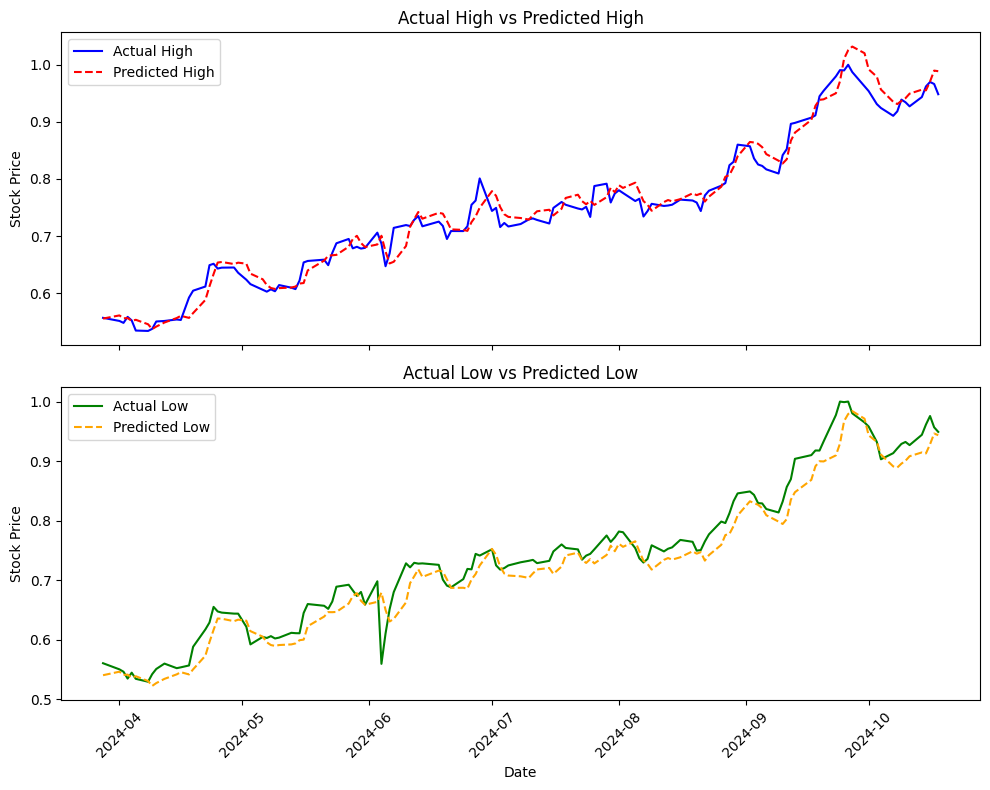


---------------------------------------MODEL ACCURACY---------------------------------------
R^2 Score: 0.97
MAE : 23.27


In [28]:
predict_merged('Airtel', merged_airtel,'Airtel_avg_sentiment')


---------------------------------------For Stock TataMotors---------------------------------------
Epoch [1/20], Loss: 0.0144
Epoch [2/20], Loss: 0.0051
Epoch [3/20], Loss: 0.0028
Epoch [4/20], Loss: 0.0008
Epoch [5/20], Loss: 0.0006
Epoch [6/20], Loss: 0.0002
Epoch [7/20], Loss: 0.0003
Epoch [8/20], Loss: 0.0001
Epoch [9/20], Loss: 0.0003
Epoch [10/20], Loss: 0.0002
Epoch [11/20], Loss: 0.0002
Epoch [12/20], Loss: 0.0002
Epoch [13/20], Loss: 0.0001
Epoch [14/20], Loss: 0.0005
Epoch [15/20], Loss: 0.0001
Epoch [16/20], Loss: 0.0001
Epoch [17/20], Loss: 0.0003
Epoch [18/20], Loss: 0.0002
Epoch [19/20], Loss: 0.0001
Epoch [20/20], Loss: 0.0002
Test Loss: 0.0006


,Date,Actual High,Predicted High,Actual Low,Predicted Low
0,2024-04-02,1008.000019,1008.108293,993.400031,986.169783
1,2024-04-03,1014.450038,1016.055802,992.550004,993.071079
2,2024-04-04,1016.999992,1024.091151,998.150023,1000.706062
3,2024-04-05,1012.499979,1030.471520,1004.400001,1007.086492
4,2024-04-08,1016.400044,1031.396238,1004.000022,1007.534816
...,...,...,...,...,...
129,2024-10-14,940.000009,948.575873,925.349985,927.835468
130,2024-10-15,935.349995,949.220597,912.999975,928.652725
131,2024-10-16,922.999994,945.456570,900.000006,924.538320
132,2024-10-17,914.949987,936.086998,890.049974,914.998825


Predicted High for the Next Day: 921.54, Predicted Low for the Next Day: 901.11
Consider Selling The Stocks

-------------------------------------------------------------VISUALIZING-------------------------------------------------------------


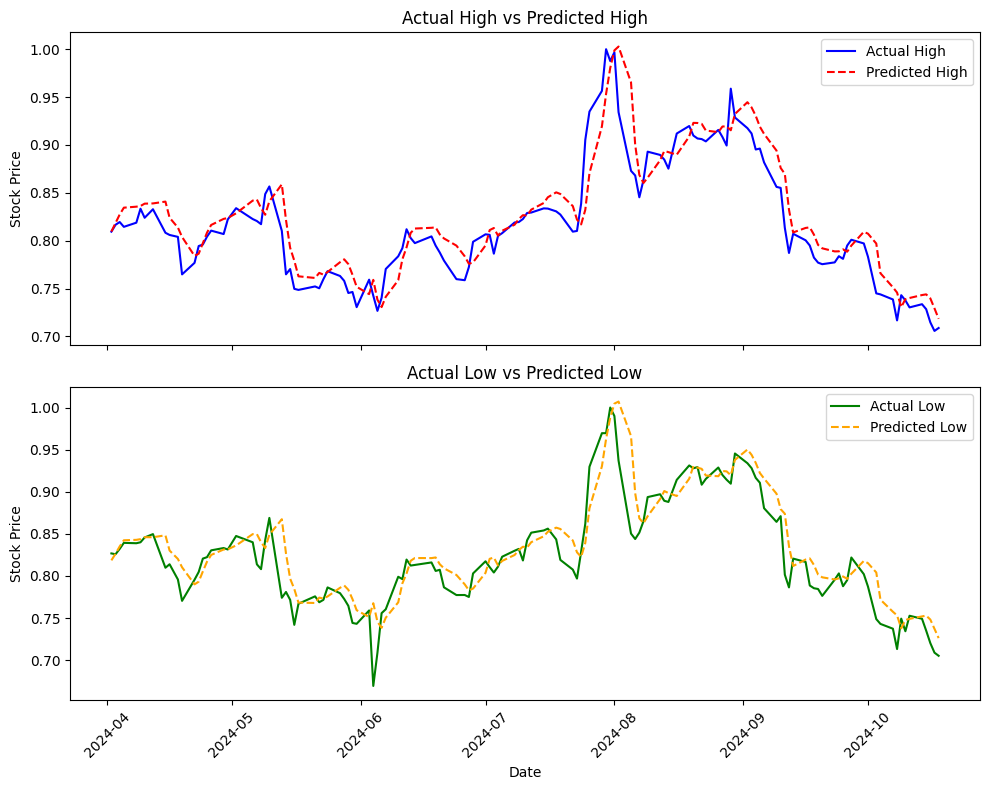


---------------------------------------MODEL ACCURACY---------------------------------------
R^2 Score: 0.85
MAE : 16.46


In [114]:
predict_merged('TataMotors', merged_tatamotors,'TataMotors_avg_sentiment')


---------------------------------------For Stock Reliance---------------------------------------
Epoch [1/20], Loss: 0.0123
Epoch [2/20], Loss: 0.0040
Epoch [3/20], Loss: 0.0018
Epoch [4/20], Loss: 0.0022
Epoch [5/20], Loss: 0.0014
Epoch [6/20], Loss: 0.0013
Epoch [7/20], Loss: 0.0016
Epoch [8/20], Loss: 0.0013
Epoch [9/20], Loss: 0.0007
Epoch [10/20], Loss: 0.0011
Epoch [11/20], Loss: 0.0010
Epoch [12/20], Loss: 0.0011
Epoch [13/20], Loss: 0.0010
Epoch [14/20], Loss: 0.0008
Epoch [15/20], Loss: 0.0005
Epoch [16/20], Loss: 0.0005
Epoch [17/20], Loss: 0.0005
Epoch [18/20], Loss: 0.0008
Epoch [19/20], Loss: 0.0011
Epoch [20/20], Loss: 0.0010
Test Loss: 0.0009


,Date,Actual High,Predicted High,Actual Low,Predicted Low
0,2024-04-10,2973.999968,2975.751436,2932.699928,2931.100169
1,2024-04-12,2972.949923,2982.954795,2926.149923,2934.358372
2,2024-04-15,2964.250004,2975.209118,2892.649883,2925.211348
3,2024-04-16,2942.350117,2955.230328,2901.850069,2905.494824
4,2024-04-18,2972.000015,2950.041857,2918.699930,2900.619680
...,...,...,...,...,...
113,2024-10-14,2760.149873,2771.342227,2736.500038,2723.508346
114,2024-10-15,2743.399919,2771.748346,2681.399880,2726.619721
115,2024-10-16,2728.000034,2734.937419,2675.250006,2684.159989
116,2024-10-17,2736.899917,2717.195614,2704.100129,2671.739037


Predicted High for the Next Day: 2742.77, Predicted Low for the Next Day: 2692.33
Consider Selling The Stocks

-------------------------------------------------------------VISUALIZING-------------------------------------------------------------


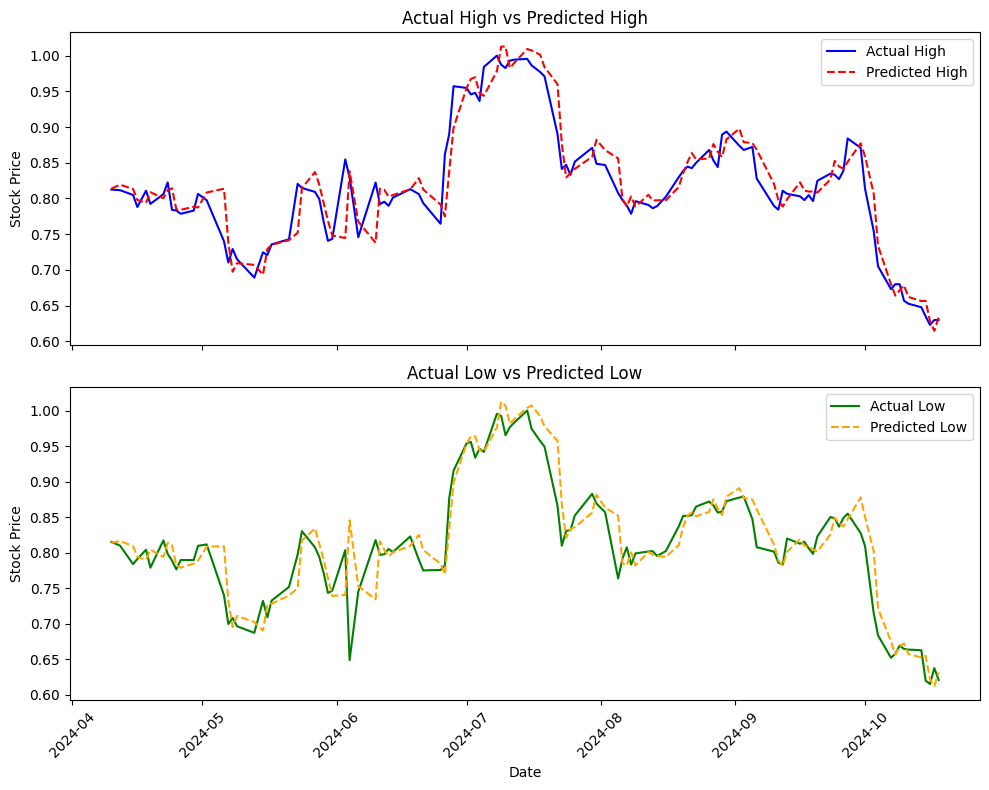


---------------------------------------MODEL ACCURACY---------------------------------------
R^2 Score: 0.90
MAE : 25.97


In [115]:
predict_merged('Reliance', merged_reliance,'Reliance_avg_sentiment')